In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### 1

In [2]:
l1=['AAPL','AMZN','META','GOOGL','IBM','INTC','MSFT','ORCL','WMT']

In [3]:
df1 = pdr.get_data_yahoo(l1, start='2019-01-01',end='2019-12-31')["Adj Close"]
df1

Symbols,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-02,38.168343,76.956497,135.679993,52.734001,91.668594,42.586578,97.147690,42.296158,87.534355
2019-01-03,34.366497,75.014000,131.740005,51.273499,89.838562,40.243778,93.573830,41.884602,87.084213
2019-01-04,35.833584,78.769501,137.949997,53.903500,93.347450,42.713211,97.925873,43.689804,87.628143
2019-01-07,35.753819,81.475502,138.050003,53.796001,94.007866,42.912209,98.050781,44.381969,88.659721
2019-01-08,36.435398,82.829002,142.529999,54.268501,95.344566,43.183578,98.761726,44.784164,89.278671
...,...,...,...,...,...,...,...,...,...
2019-12-24,69.738731,89.460503,205.119995,67.221497,112.550056,55.080463,153.433289,50.837082,114.346443
2019-12-26,71.122368,93.438499,207.789993,68.123497,112.491669,55.460583,154.690887,50.960747,114.355995
2019-12-27,71.095375,93.489998,208.100006,67.732002,112.791870,55.701633,154.973633,50.856094,114.422966


### 1.1 

In [6]:
df2=np.log(df1/df1.shift(1)).dropna()
df2

,AAPL,AMZN,META,GOOGL,IBM,INTC,MSFT,ORCL,WMT
Date,,,,,,,,,
2019-01-03,-0.104924,-0.025566,-0.029469,-0.028086,-0.020166,-0.056584,-0.037482,-0.009778,-0.005156
2019-01-04,0.041803,0.048851,0.046061,0.050021,0.038314,0.059553,0.045460,0.042197,0.006227
2019-01-07,-0.002228,0.033777,0.000725,-0.001996,0.007050,0.004648,0.001275,0.015719,0.011703
2019-01-08,0.018884,0.016476,0.031937,0.008745,0.014119,0.006304,0.007225,0.009021,0.006957
2019-01-09,0.016839,0.001713,0.011857,-0.003433,0.007151,0.005640,0.014198,-0.002091,-0.003262
...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000950,-0.002116,-0.005154,-0.004601,-0.004214,0.003034,-0.000190,-0.005040,0.004025
2019-12-26,0.019646,0.043506,0.012933,0.013329,-0.000519,0.006877,0.008163,0.002430,0.000084
2019-12-27,-0.000380,0.000551,0.001491,-0.005763,0.002665,0.004337,0.001826,-0.002056,0.000585


### 1.2

In [7]:
frontier_y=np.linspace(start=0.2,stop=0.5,num=100)
frontier_y

array([0.2       , 0.2030303 , 0.20606061, 0.20909091, 0.21212121,
       0.21515152, 0.21818182, 0.22121212, 0.22424242, 0.22727273,
       0.23030303, 0.23333333, 0.23636364, 0.23939394, 0.24242424,
       0.24545455, 0.24848485, 0.25151515, 0.25454545, 0.25757576,
       0.26060606, 0.26363636, 0.26666667, 0.26969697, 0.27272727,
       0.27575758, 0.27878788, 0.28181818, 0.28484848, 0.28787879,
       0.29090909, 0.29393939, 0.2969697 , 0.3       , 0.3030303 ,
       0.30606061, 0.30909091, 0.31212121, 0.31515152, 0.31818182,
       0.32121212, 0.32424242, 0.32727273, 0.33030303, 0.33333333,
       0.33636364, 0.33939394, 0.34242424, 0.34545455, 0.34848485,
       0.35151515, 0.35454545, 0.35757576, 0.36060606, 0.36363636,
       0.36666667, 0.36969697, 0.37272727, 0.37575758, 0.37878788,
       0.38181818, 0.38484848, 0.38787879, 0.39090909, 0.39393939,
       0.3969697 , 0.4       , 0.4030303 , 0.40606061, 0.40909091,
       0.41212121, 0.41515152, 0.41818182, 0.42121212, 0.42424

### 1.3 

In [8]:
# objective function
def std(weight):
    std=np.dot(weight.T, np.dot(df2.cov()*250, weight))**0.5    
    return std

### 1.4 

In [9]:
# sum of the weights minus one is zero
def sum_weight(weight):
    return np.sum(weight)-1

In [10]:
def ret(weight):
    ret=np.dot(df2.mean(),weight)*250  
    return ret

### 1.5 

In [11]:
# lower and upper bounds 
bound = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0,1))

### 1.6 

In [12]:
a1=np.array([1/9]*9)
a1

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

### 1.7  

In [13]:
frontier_x=[]

In [14]:
# for each return, find the portfolio with the minimum std
for a_return in frontier_y:
    constraint = ({'type':'eq','fun': sum_weight},{'type':'eq','fun': lambda weight: ret(weight)-a_return})
    min_std=minimize(fun=std,x0=a1,method='SLSQP',bounds=bound,constraints=constraint)
    frontier_x.append(round(min_std["fun"],6))

In [16]:
frontier_x

[0.145994,
 0.142931,
 0.140114,
 0.137559,
 0.135281,
 0.133294,
 0.131606,
 0.130176,
 0.128993,
 0.128063,
 0.127395,
 0.126989,
 0.126778,
 0.126621,
 0.126515,
 0.12643,
 0.126357,
 0.126297,
 0.126253,
 0.126224,
 0.126211,
 0.126213,
 0.126227,
 0.126253,
 0.126291,
 0.126341,
 0.126404,
 0.126478,
 0.126564,
 0.126663,
 0.126773,
 0.126895,
 0.127029,
 0.127175,
 0.127333,
 0.127503,
 0.127684,
 0.127876,
 0.128085,
 0.128308,
 0.128547,
 0.128801,
 0.129071,
 0.129355,
 0.129655,
 0.129969,
 0.1303,
 0.130648,
 0.131013,
 0.131394,
 0.131792,
 0.132208,
 0.132639,
 0.133087,
 0.133551,
 0.134031,
 0.134526,
 0.135042,
 0.13559,
 0.136171,
 0.136785,
 0.137431,
 0.138109,
 0.138818,
 0.139557,
 0.140326,
 0.141125,
 0.141954,
 0.142811,
 0.143696,
 0.144609,
 0.145548,
 0.146515,
 0.147508,
 0.148526,
 0.149569,
 0.150638,
 0.151729,
 0.152844,
 0.153982,
 0.155144,
 0.156328,
 0.157535,
 0.158765,
 0.160015,
 0.161287,
 0.16258,
 0.163892,
 0.165225,
 0.166576,
 0.167946,
 0.1

### 1.8 

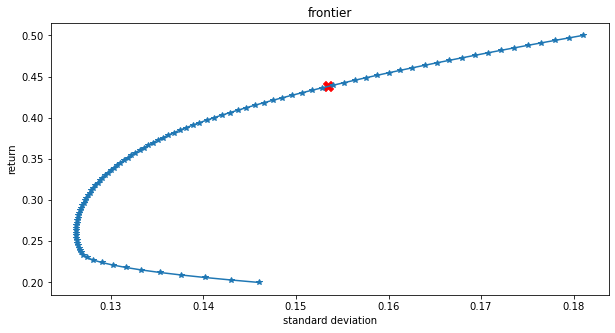

In [17]:
plt.figure(figsize = (10, 5))
plt.plot(frontier_x,frontier_y,marker="*")
plt.scatter(x=0.153483,y=0.438073,color="red",s=100,marker="X")
plt.xlabel('standard deviation')
plt.ylabel('return')
plt.title('frontier');

### 1.9

In [18]:
min_std=min(frontier_x)
min_std

0.126211

In [19]:
frontier_x.index(min_std)

20

### 1.10 

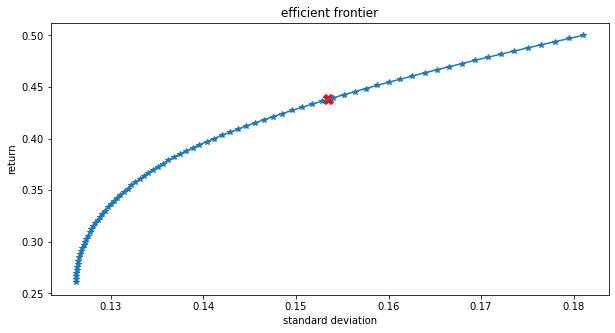

In [20]:
plt.figure(figsize = (10, 5))
plt.plot(frontier_x[20:],frontier_y[20:],marker="*")
plt.scatter(x=0.153483,y=0.438073,color="red",s=100,marker="X")
plt.xlabel('standard deviation')
plt.ylabel('return')
plt.title('efficient frontier');